In [29]:
import os, random, shutil

# Correct source paths
OFFICIAL_SRC = "/content/official_scans/official_scans"
WIKI_SRC = "/content/wiki_scans/wiki_scans"

# Destination folders
TRAIN_OFFICIAL = "dataset/train/official"
TRAIN_WIKI = "dataset/train/wiki"
VAL_OFFICIAL = "dataset/val/official"
VAL_WIKI = "dataset/val/wiki"

# Create folders
for path in [TRAIN_OFFICIAL, TRAIN_WIKI, VAL_OFFICIAL, VAL_WIKI]:
    os.makedirs(path, exist_ok=True)

# Read images
official_imgs = [f for f in os.listdir(OFFICIAL_SRC) if f.endswith(".png")]
wiki_imgs = [f for f in os.listdir(WIKI_SRC) if f.endswith(".png")]

# Shuffle
random.shuffle(official_imgs)
random.shuffle(wiki_imgs)

split_ratio = 0.8

def split_and_copy(files, src, train_dir, val_dir):
    split = int(len(files) * split_ratio)
    for f in files[:split]:
        shutil.copy(os.path.join(src, f), train_dir)
    for f in files[split:]:
        shutil.copy(os.path.join(src, f), val_dir)

# Split datasets
split_and_copy(official_imgs, OFFICIAL_SRC, TRAIN_OFFICIAL, VAL_OFFICIAL)
split_and_copy(wiki_imgs, WIKI_SRC, TRAIN_WIKI, VAL_WIKI)

print("✅ Dataset split completed")
print("Official:", len(official_imgs))
print("Wiki:", len(wiki_imgs))


✅ Dataset split completed
Official: 1100
Wiki: 1189


In [30]:
!find dataset -type d


dataset
dataset/train
dataset/train/official
dataset/train/wiki
dataset/val
dataset/val/official
dataset/val/wiki


In [31]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout


In [33]:
IMG_SIZE = (224, 224)
BATCH_SIZE = 32

train_gen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=15,
    zoom_range=0.2,
    horizontal_flip=True
)

val_gen = ImageDataGenerator(rescale=1./255)

train_data = train_gen.flow_from_directory(
    "dataset/train",
    target_size=IMG_SIZE,
    batch_size=BATCH_SIZE,
    class_mode="binary"
)

val_data = val_gen.flow_from_directory(
    "dataset/val",
    target_size=IMG_SIZE,
    batch_size=BATCH_SIZE,
    class_mode="binary"
)


Found 1831 images belonging to 2 classes.
Found 458 images belonging to 2 classes.


In [34]:
model = Sequential([
    Conv2D(32, (3,3), activation='relu', input_shape=(224,224,3)),
    MaxPooling2D(2,2),

    Conv2D(64, (3,3), activation='relu'),
    MaxPooling2D(2,2),

    Conv2D(128, (3,3), activation='relu'),
    MaxPooling2D(2,2),

    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.5),
    Dense(1, activation='sigmoid')
])


/usr/local/lib/python3.12/dist-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [35]:
model.compile(
    optimizer='adam',
    loss='binary_crossentropy',
    metrics=['accuracy']
)


In [37]:
history = model.fit(
    train_data,
    validation_data=val_data,
    epochs=10
)


/usr/local/lib/python3.12/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/10
58/58 ━━━━━━━━━━━━━━━━━━━━ 154s 3s/step - accuracy: 0.5483 - loss: 0.9423 - val_accuracy: 0.8646 - val_loss: 0.3199
Epoch 2/10
58/58 ━━━━━━━━━━━━━━━━━━━━ 144s 2s/step - accuracy: 0.7832 - loss: 0.4611 - val_accuracy: 0.8712 - val_loss: 0.2810
Epoch 3/10
58/58 ━━━━━━━━━━━━━━━━━━━━ 146s 3s/step - accuracy: 0.8609 - loss: 0.3300 - val_accuracy: 0.9236 - val_loss: 0.1846
Epoch 4/10
58/58 ━━━━━━━━━━━━━━━━━━━━ 145s 3s/step - accuracy: 0.8853 - loss: 0.2714 - val_accuracy: 0.9476 - val_loss: 0.1161
Epoch 5/10
58/58 ━━━━━━━━━━━━━━━━━━━━ 152s 3s/step - accuracy: 0.9164 - loss: 0.1968 - val_accuracy: 0.9847 - val_loss: 0.0550
Epoch 6/10
58/58 ━━━━━━━━━━━━━━━━━━━━ 143s 2s/step - accuracy: 0.9289 - loss: 0.1699 - val_accuracy: 0.9716 - val_loss: 0.0631
Epoch 7/10
58/58 ━━━━━━━━━━━━━━━━━━━━ 151s 3s/step - accuracy: 0.9054 - loss: 0.2311 - val_accuracy: 0.9389 - val_loss: 0.1185
Epoch 8/10
58/58 ━━━━━━━━━━━━━━━━━━━━ 171s 3s/step - accuracy: 0.9351 - loss: 0.1797 - val_accuracy: 0.9563 - v

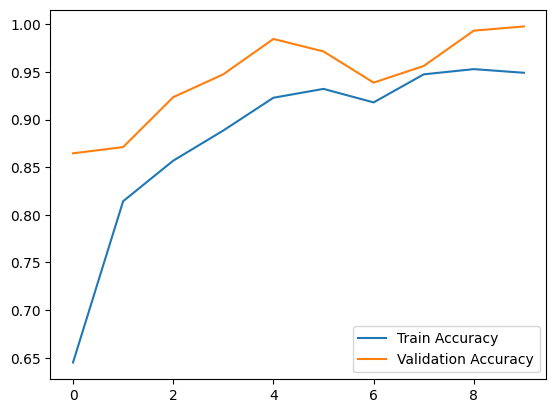

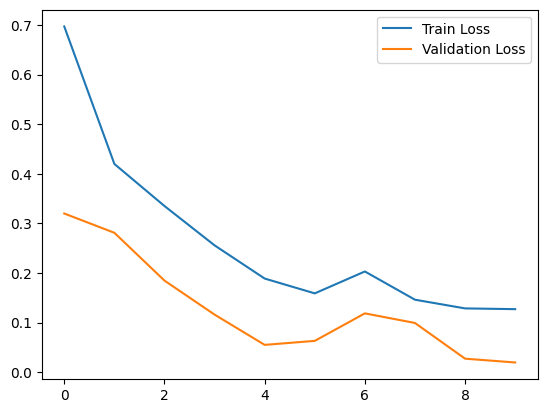

In [38]:
import matplotlib.pyplot as plt

plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.legend()
plt.show()

plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.legend()
plt.show()


In [40]:
# Save model in Colab working directory
model.save("/content/tracefinder_model.h5")
print("Model saved successfully")


Model saved successfully
